In [1]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
from abarzbar import *

In [2]:
data = genfromtxt("20m_204i_0mdot/fe1p4.data", names=True,  skip_header=5)
iso = genfromtxt("mesa_205_az.dat", usecols=3,unpack=True,dtype='str')
z, a, n = genfromtxt("mesa_205_az.dat", usecols=(0,1,2),unpack=True)
iso21 = genfromtxt("mesa_aprox21_az.dat", usecols=3,unpack=True,dtype='str')
z21, a21, n21 = genfromtxt("mesa_aprox21_az.dat", usecols=(0,1,2),unpack=True)

[ 89  90  96  97  98  99 105 106 107 108 113 114 115 116 123 124 125 126
 134 143]


(1e-05, 1)

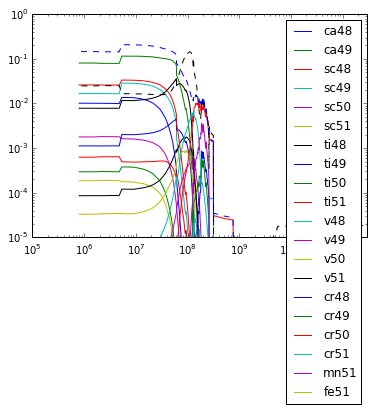

In [3]:
x204, x = x204to21(data,iso,a,z,iso21)
ind = where((a>47)&(a<52))[0]
print ind
for i in ind:
    plt.plot(data['radius']*7e10, x204[i,:], label=str(iso[i]))
plt.plot(data['radius']*7e10, x[asarray(where(iso21=='fe52'))[0][0],:], '--')
plt.plot(data['radius']*7e10, x[asarray(where(iso21=='cr48'))[0][0],:],'--')
plt.semilogy()
plt.semilogx()
plt.legend()
plt.xlim((1e5,3e11))
plt.ylim((1e-5, 1))

[ 0.  0.  0. ...,  0.  0.  0.] 2287


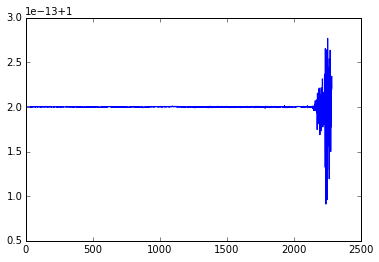

In [4]:
tot = zeros(size(x[0]))
print tot, size(x[0])
for j in iso21:
    tot += x[asarray(where(iso21==j))[0][0],:]
plt.plot(tot)

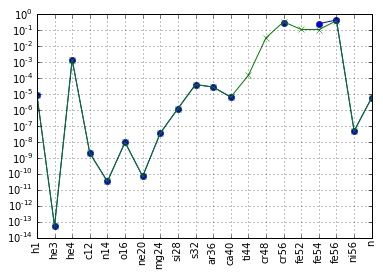

In [5]:
ind = 2200
xax = range(size(a21))
plt.xticks(xax,list(iso21),rotation='vertical')
x1 = fixye(abar(x204[:,ind], a), zbar(x204[:,ind],a,z), x[:,ind], iso21, a21, z21,False)
plt.plot(x1, 'o-')
plt.plot(x[:,2200],'x-')
#plt.plot(a, x204[:,2200], 's')
plt.semilogy()
plt.grid(True)

In [6]:
nr = size(data['radius'])
yeofr21  = zeros(nr)
yeofr204 = zeros(nr)
abar21   = zeros(nr)
zbar21   = zeros(nr)
abar204  = zeros(nr)
zbar204  = zeros(nr)
for i in range(nr):
    abar21[i] = abar(x[:,i], a21)
    zbar21[i] = zbar(x[:,i],a21, z21)
    yeofr21[i] = zbar21[i]/abar21[i]
    abar204[i] = abar(x204[:,i], a)
    zbar204[i] = zbar(x204[:,i], a, z)
    yeofr204[i] = zbar204[i]/abar204[i]

[]

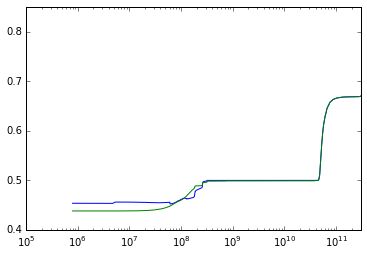

In [7]:
radcm = 7e10*data['radius']
plt.plot(radcm, yeofr21)
plt.plot(radcm, yeofr204)
plt.xlim((1e5,3e11))
plt.semilogx()

In [8]:
for i in range(nr):
    x1 = fixye(abar(x204[:,i], a), zbar(x204[:,i], a, z), x[:,i], iso21, a21, z21, False)
    x1 = renorm(x1)
    x[:,i] = x1[:]
    abar21[i] = abar(x[:,i], a21)
    zbar21[i] = zbar(x[:,i],a21, z21)
    yeofr21[i] = zbar21[i]/abar21[i]
    #print yeofr21[i], yeofr204[i]

In [9]:
print x[asarray(where(iso21=='cr48'))[0][0],1829]
print x[asarray(where(iso21=='o16'))[0][0],1829]
x1 = fixye(abar(x204[:,1829], a), zbar(x204[:,1829], a, z), x[:,1829], iso21, a21, z21, True)
print x1.sum()
x1 = renorm(x1)
print x1[asarray(where(iso21=='cr48'))[0][0]]
print x1.sum()

1e-20
0.645545359024
ti44,cr48,fe52 -> fe54 0.498885962883 0.498885962883 0.498885962883
1.0
1e-20
1.0


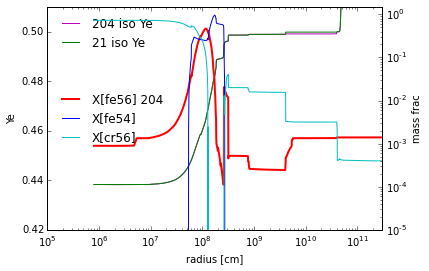

In [15]:
fig, ax1 = plt.subplots()
radcm = 7e10*data['radius']
#radcm = data['mass']
plt.plot(radcm, yeofr204, 'm', label=r'204 iso Ye')
plt.plot(radcm, yeofr21, 'g', label=r'21 iso Ye')
plt.semilogx()
plt.ylim((0.42, 0.51))
plt.xlabel('radius [cm]')
plt.ylabel('Ye')
plt.legend(loc='upper left')
leg = plt.gca().get_legend()
leg.draw_frame(False)
ax2 = ax1.twinx()
ax2.plot(radcm, data['fe56'], 'r', label=r'X[fe56] 204', linewidth=2)
ax2.plot(radcm, x[asarray(where(iso21=='fe54'))[0][0],:], 'b', label=r'X[fe54]' )
ax2.plot(radcm, x[asarray(where(iso21=='cr56'))[0][0],:], 'c', label=r'X[cr56]' )
ax2.set_ylim((1e-5,1.5))
ax2.semilogy()
plt.xlim((1e5,3e11))
ax2.set_ylabel(r'mass frac')
plt.legend(loc='center left')
leg = plt.gca().get_legend()
leg.draw_frame(False)
plt.savefig('ye204v21.pdf')

In [ ]:
fig, ax1 = plt.subplots()
#radcm = 7e10*data['radius']
radcm = data['mass']
plt.plot(radcm, yeofr204, label=r'204 iso Ye')
plt.plot(radcm, yeofr21, label=r'21 iso Ye')
#plt.semilogx()
plt.ylim((0.42, 0.51))
#plt.xlabel('radius [cm]')
plt.xlabel('mass [Msun]')
plt.ylabel('Ye')
plt.legend(loc='center right')
leg = plt.gca().get_legend()
leg.draw_frame(False)
ax2 = ax1.twinx()
ax2.plot(radcm, abar204, 'r', label=r'abar204' )
ax2.plot(radcm, abar21, 'c', label=r'abar21' )
ax2.plot(radcm, 2*zbar204, 'r--', label=r'2*zbar204' )
ax2.plot(radcm, 2*zbar21, 'c--', label=r'2*zbar21' )
#ax2.set_ylim((1e-5,1))
#ax2.semilogy()
ax2.set_ylabel(r'abar,2*zbar')
#plt.xlim((1e5,3e10))
plt.xlim((0,2.5))
plt.legend(loc='center left')
leg = plt.gca().get_legend()
leg.draw_frame(False)
plt.savefig('az204v21.pdf')

In [ ]:
write_model(data, x, yeofr204, iso21, 'mesa20_204to21_fe1p4.1d', 'MESA model of 20 Msun star at Mfe = 1.4 Msun')

In [ ]:
data = genfromtxt("15m_204i_0mdot/collapse.data", names=True,  skip_header=5)
print "15", 2.5/(data['radius'][where(data['mass']<2.5)].max()*7e2)
print "15", 1.75/(data['radius'][where(data['mass']<1.75)].max()*7e2)
plt.plot(data['radius']*7e10, data['logRho'],label='15')
data = genfromtxt("20m_204i_0mdot/collapse.data", names=True,  skip_header=5)
print "20", 2.5/(data['radius'][where(data['mass']<2.5)].max()*7e2)
print "20", 1.75/(data['radius'][where(data['mass']<1.75)].max()*7e2)
plt.plot(data['radius']*7e10, data['logRho'],label='20')
data = genfromtxt("25m_204i_0mdot/collapse.data", names=True,  skip_header=5)
print "25", 2.5/(data['radius'][where(data['mass']<2.5)].max()*7e2)
print "25", 1.75/(data['radius'][where(data['mass']<1.75)].max()*7e2)
plt.plot(data['radius']*7e10, data['logRho'],label='25')
data = genfromtxt("30m_204i_0mdot/collapse.data", names=True,  skip_header=5)
print "30", 2.5/(data['radius'][where(data['mass']<2.5)].max()*7e2)
print "30", 1.75/(data['radius'][where(data['mass']<1.75)].max()*7e2)
plt.plot(data['radius']*7e10, data['logRho'],label='30')
plt.legend()
plt.semilogx()
plt.xlim((1e7,1e9))
plt.ylim((4,11))

In [ ]:
print data['Fe core mass']